In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
#import data
data = pd.read_csv("Klastering.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Check for missing values
print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [5]:
data.dropna(inplace=True)

In [6]:
data.drop('CUST_ID', axis=1, inplace=True)

In [7]:
# Scale data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
print(data_scaled)

[[-0.74462486 -0.37004679 -0.42918384 ... -0.30550763 -0.53772694
   0.35518066]
 [ 0.76415211  0.06767893 -0.47320819 ...  0.08768873  0.21238001
   0.35518066]
 [ 0.42660239  0.50540465 -0.11641251 ... -0.09990611 -0.53772694
   0.35518066]
 ...
 [-0.75297728 -0.29709491 -0.40657175 ... -0.32957217  0.30614422
  -4.22180042]
 [-0.75772142 -0.29709491 -0.47320819 ... -0.34081076  0.30614422
  -4.22180042]
 [-0.58627829 -1.09958965  0.03129519 ... -0.32709767 -0.53772694
  -4.22180042]]


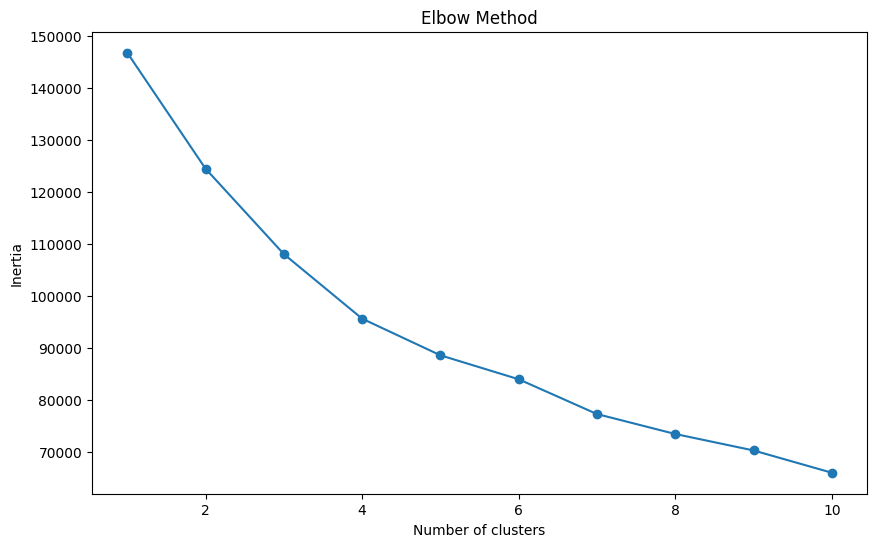

In [9]:
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

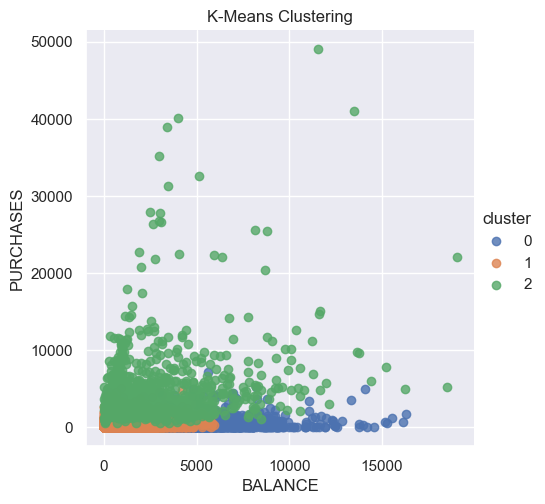

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

labels = kmeans.labels_

data['cluster'] = labels

import seaborn as sns
sns.set()
sns.lmplot(x='BALANCE', y='PURCHASES', data=data, hue='cluster', fit_reg=False)
plt.title('K-Means Clustering')
plt.show()

In [11]:
#Silhouette Coefficient: mengukur pemisahan antara cluster dan kohesi dalam cluster. Nilai yang lebih tinggi menunjukkan cluster yang terpisah dengan baik dan padat.
#Calinski-Harabasz Index: mengukur rasio varians antar-cluster terhadap varians dalam-cluster. Nilai yang lebih tinggi menunjukkan kluster yang terpisah dengan baik.
#Davies-Bouldin Index: mengukur kesamaan antar cluster. Nilai yang lebih rendah menunjukkan kluster yang terpisah dengan baik.
silhouette = silhouette_score(data_scaled, labels)
calinski_harabasz = calinski_harabasz_score(data_scaled, labels)
davies_bouldin = davies_bouldin_score(data_scaled, labels)

print("Clustering Metrics:")
print(f"Silhouette Coefficient: {silhouette * 100:.2f}%")
print(f"Calinski-Harabasz Index: {calinski_harabasz * 100:.2f}%")
print(f"Davies-Bouldin Index: {(1 - davies_bouldin) * 100:.2f}%")

Clustering Metrics:
Silhouette Coefficient: 24.71%
Calinski-Harabasz Index: 154652.82%
Davies-Bouldin Index: -60.54%


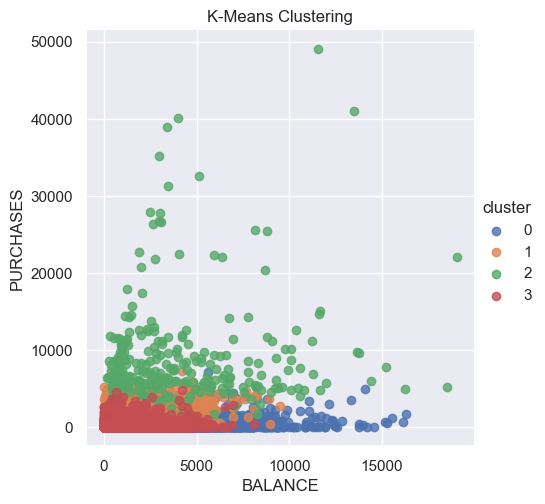

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

labels = kmeans.labels_

data['cluster'] = labels

import seaborn as sns
sns.set()
sns.lmplot(x='BALANCE', y='PURCHASES', data=data, hue='cluster', fit_reg=False)
plt.title('K-Means Clustering')
plt.show()

In [13]:
#Silhouette Coefficient: mengukur pemisahan antara cluster dan kohesi dalam cluster. Nilai yang lebih tinggi menunjukkan cluster yang terpisah dengan baik dan padat.
#Calinski-Harabasz Index: mengukur rasio varians antar-cluster terhadap varians dalam-cluster. Nilai yang lebih tinggi menunjukkan kluster yang terpisah dengan baik.
#Davies-Bouldin Index: mengukur kesamaan antar cluster. Nilai yang lebih rendah menunjukkan kluster yang terpisah dengan baik.
silhouette = silhouette_score(data_scaled, labels)
calinski_harabasz = calinski_harabasz_score(data_scaled, labels)
davies_bouldin = davies_bouldin_score(data_scaled, labels)

print("Clustering Metrics:")
print(f"Silhouette Coefficient: {silhouette * 100:.2f}%")
print(f"Calinski-Harabasz Index: {calinski_harabasz * 100:.2f}%")
print(f"Davies-Bouldin Index: {(1 - davies_bouldin) * 100:.2f}%")

Clustering Metrics:
Silhouette Coefficient: 20.05%
Calinski-Harabasz Index: 153853.72%
Davies-Bouldin Index: -55.71%


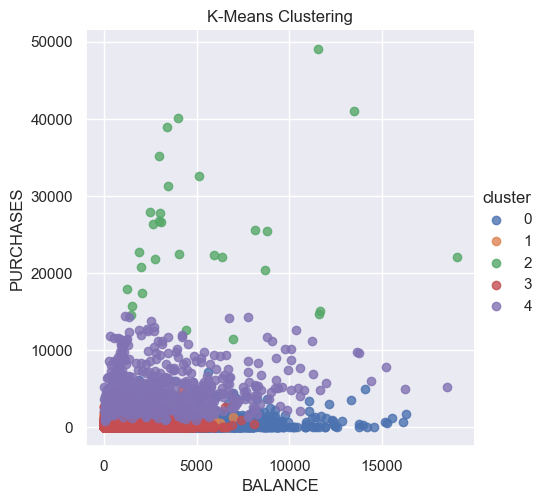

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

labels = kmeans.labels_

data['cluster'] = labels

import seaborn as sns
sns.set()
sns.lmplot(x='BALANCE', y='PURCHASES', data=data, hue='cluster', fit_reg=False)
plt.title('K-Means Clustering')
plt.show()

In [15]:
#Silhouette Coefficient: mengukur pemisahan antara cluster dan kohesi dalam cluster. Nilai yang lebih tinggi menunjukkan cluster yang terpisah dengan baik dan padat.
#Calinski-Harabasz Index: mengukur rasio varians antar-cluster terhadap varians dalam-cluster. Nilai yang lebih tinggi menunjukkan kluster yang terpisah dengan baik.
#Davies-Bouldin Index: mengukur kesamaan antar cluster. Nilai yang lebih rendah menunjukkan kluster yang terpisah dengan baik.
silhouette = silhouette_score(data_scaled, labels)
calinski_harabasz = calinski_harabasz_score(data_scaled, labels)
davies_bouldin = davies_bouldin_score(data_scaled, labels)

print("Clustering Metrics:")
print(f"Silhouette Coefficient: {silhouette * 100:.2f}%")
print(f"Calinski-Harabasz Index: {calinski_harabasz * 100:.2f}%")
print(f"Davies-Bouldin Index: {(1 - davies_bouldin) * 100:.2f}%")

Clustering Metrics:
Silhouette Coefficient: 19.03%
Calinski-Harabasz Index: 141709.75%
Davies-Bouldin Index: -50.00%


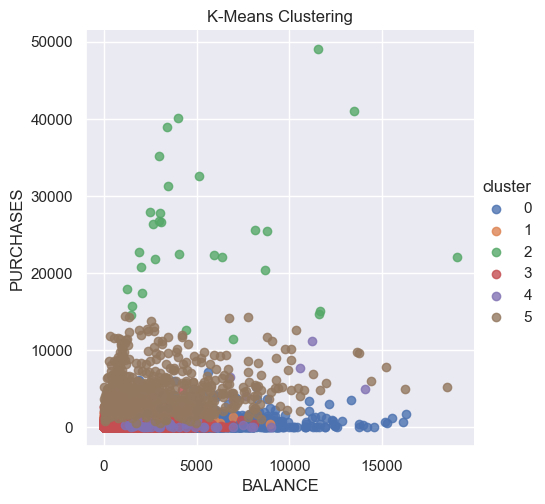

In [16]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

labels = kmeans.labels_

data['cluster'] = labels

import seaborn as sns
sns.set()
sns.lmplot(x='BALANCE', y='PURCHASES', data=data, hue='cluster', fit_reg=False)
plt.title('K-Means Clustering')
plt.show()

In [17]:
#Silhouette Coefficient: mengukur pemisahan antara cluster dan kohesi dalam cluster. Nilai yang lebih tinggi menunjukkan cluster yang terpisah dengan baik dan padat.
#Calinski-Harabasz Index: mengukur rasio varians antar-cluster terhadap varians dalam-cluster. Nilai yang lebih tinggi menunjukkan kluster yang terpisah dengan baik.
#Davies-Bouldin Index: mengukur kesamaan antar cluster. Nilai yang lebih rendah menunjukkan kluster yang terpisah dengan baik.
silhouette = silhouette_score(data_scaled, labels)
calinski_harabasz = calinski_harabasz_score(data_scaled, labels)
davies_bouldin = davies_bouldin_score(data_scaled, labels)

print("Clustering Metrics:")
print(f"Silhouette Coefficient: {silhouette * 100:.2f}%")
print(f"Calinski-Harabasz Index: {calinski_harabasz * 100:.2f}%")
print(f"Davies-Bouldin Index: {(1 - davies_bouldin) * 100:.2f}%")

Clustering Metrics:
Silhouette Coefficient: 19.30%
Calinski-Harabasz Index: 129050.04%
Davies-Bouldin Index: -39.46%


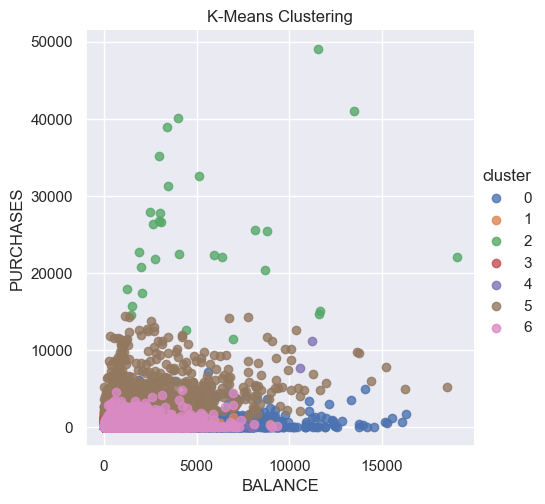

In [18]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

labels = kmeans.labels_

data['cluster'] = labels

import seaborn as sns
sns.set()
sns.lmplot(x='BALANCE', y='PURCHASES', data=data, hue='cluster', fit_reg=False)
plt.title('K-Means Clustering')
plt.show()

In [19]:
#Silhouette Coefficient: mengukur pemisahan antara cluster dan kohesi dalam cluster. Nilai yang lebih tinggi menunjukkan cluster yang terpisah dengan baik dan padat.
#Calinski-Harabasz Index: mengukur rasio varians antar-cluster terhadap varians dalam-cluster. Nilai yang lebih tinggi menunjukkan kluster yang terpisah dengan baik.
#Davies-Bouldin Index: mengukur kesamaan antar cluster. Nilai yang lebih rendah menunjukkan kluster yang terpisah dengan baik.
silhouette = silhouette_score(data_scaled, labels)
calinski_harabasz = calinski_harabasz_score(data_scaled, labels)
davies_bouldin = davies_bouldin_score(data_scaled, labels)

print("Clustering Metrics:")
print(f"Silhouette Coefficient: {silhouette * 100:.2f}%")
print(f"Calinski-Harabasz Index: {calinski_harabasz * 100:.2f}%")
print(f"Davies-Bouldin Index: {(1 - davies_bouldin) * 100:.2f}%")

Clustering Metrics:
Silhouette Coefficient: 20.58%
Calinski-Harabasz Index: 129280.94%
Davies-Bouldin Index: -32.93%


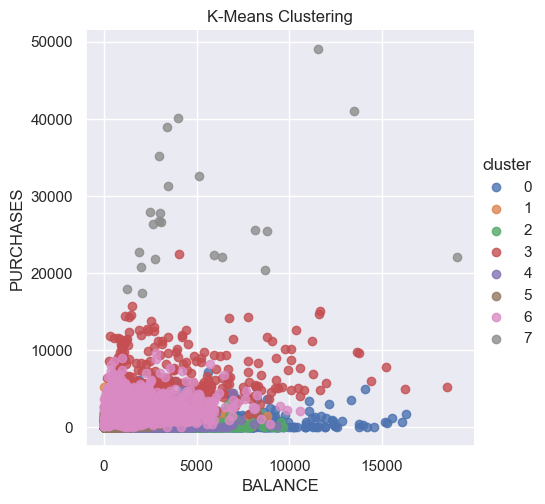

In [20]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(data_scaled)

labels = kmeans.labels_

data['cluster'] = labels

import seaborn as sns
sns.set()
sns.lmplot(x='BALANCE', y='PURCHASES', data=data, hue='cluster', fit_reg=False)
plt.title('K-Means Clustering')
plt.show()

In [21]:
#Silhouette Coefficient: mengukur pemisahan antara cluster dan kohesi dalam cluster. Nilai yang lebih tinggi menunjukkan cluster yang terpisah dengan baik dan padat.
#Calinski-Harabasz Index: mengukur rasio varians antar-cluster terhadap varians dalam-cluster. Nilai yang lebih tinggi menunjukkan kluster yang terpisah dengan baik.
#Davies-Bouldin Index: mengukur kesamaan antar cluster. Nilai yang lebih rendah menunjukkan kluster yang terpisah dengan baik.
silhouette = silhouette_score(data_scaled, labels)
calinski_harabasz = calinski_harabasz_score(data_scaled, labels)
davies_bouldin = davies_bouldin_score(data_scaled, labels)

print("Clustering Metrics:")
print(f"Silhouette Coefficient: {silhouette * 100:.2f}%")
print(f"Calinski-Harabasz Index: {calinski_harabasz * 100:.2f}%")
print(f"Davies-Bouldin Index: {(1 - davies_bouldin) * 100:.2f}%")

Clustering Metrics:
Silhouette Coefficient: 18.78%
Calinski-Harabasz Index: 123024.10%
Davies-Bouldin Index: -57.22%
